In [187]:
from pandas import DataFrame, Series
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import log_loss


In [209]:
df = pd.read_csv("purchase.csv")
df.head()

,MatID,Quantity,Shipping_Times,Unit_Price,CustomerID,SupID2
0,BYC104,252,19,21,1,C
1,BYC104,50,12,27,2,B
2,BYC104,59,19,25,3,A
3,BYC104,200,23,25,2,B
4,BYC104,217,20,33,1,C


In [210]:
df.dtypes

MatID             object
Quantity           int64
Shipping_Times     int64
Unit_Price         int64
CustomerID         int64
SupID2            object
dtype: object

In [211]:
df_only = pd.get_dummies(df, columns = ['MatID'], drop_first = True)
df_only.columns

Index(['Quantity', 'Shipping_Times', 'Unit_Price', 'CustomerID', 'SupID2',
       'MatID_CBX12', 'MatID_HYB50', 'MatID_LGR10', 'MatID_NTCDA10'],
      dtype='object')

In [212]:
target = df_only['SupID2']
purchase = df_only.drop(['SupID2'], 1)


In [213]:
X_train, X_test, y_train, y_test = train_test_split(purchase,target, test_size = 0.2)

In [214]:
from sklearn.cross_validation import cross_val_score
def cv_stats(cv_score):
    """ Returns the mean and standard deviation in a readable format"""
    mean = np.mean(cv_score)
    std = np.std(cv_score)
    return mean, std

In [ ]:
k = 40
while k < 80:
    clf = RandomForestClassifier(k)
    score = cross_val_score(clf, X_train, y_train, cv=5)
    stats = cv_stats(score)
    print("For k={0}", k, "; Average={0}, STDEV={1}".format(*stats))

    k +=1


# clf = RandomForestClassifier(n_estimators=100)  
# clf.fit(X_train,y_train)
# preds = clf.predict_proba(X_test)



In [215]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X = (X_train - mean) / std


In [216]:
clf = RandomForestClassifier(n_estimators=53,random_state=123)  
clf.fit(X_train,y_train)
preds = clf.predict_proba(X_test)
preds2 =clf.predict(X_test)


In [217]:
log_loss(y_test,preds)

0.11480352771004254

In [218]:
preds2

array(['A', 'B', 'A', 'C', 'B', 'B', 'A', 'B', 'C', 'C', 'C', 'C', 'A',
       'B', 'A', 'C', 'C', 'A', 'B', 'A', 'A', 'B', 'A', 'A', 'B', 'A',
       'B', 'A', 'C', 'C', 'A', 'A', 'B', 'C', 'B', 'B', 'A', 'C', 'A',
       'B', 'C', 'C', 'A', 'B', 'C', 'A', 'A', 'B', 'A', 'C', 'A', 'B',
       'A', 'C', 'B', 'A', 'B', 'A', 'C', 'A', 'A', 'A', 'C', 'A', 'C',
       'C', 'B', 'B', 'A', 'B', 'A', 'A', 'A', 'B', 'C', 'B', 'B', 'A',
       'B', 'A', 'C', 'C', 'B', 'B', 'A', 'C', 'B', 'C', 'A', 'C', 'A',
       'C', 'C', 'B', 'C', 'B', 'A', 'B', 'B', 'A', 'A', 'B', 'C', 'C',
       'A', 'A', 'A', 'B', 'A', 'B', 'A', 'A', 'A', 'C', 'A', 'A', 'B',
       'C', 'A', 'A', 'C', 'B', 'C', 'C', 'B', 'B', 'B', 'B', 'A', 'B',
       'C', 'A', 'C', 'A', 'B', 'B', 'B', 'A', 'B', 'A', 'B', 'A', 'B',
       'C', 'B', 'A', 'A', 'A', 'A', 'C', 'C', 'B', 'C', 'B', 'B', 'B',
       'B', 'B', 'C', 'A', 'A', 'C', 'C', 'A', 'C', 'C', 'C', 'A', 'B',
       'A', 'A', 'C', 'A', 'A', 'A', 'A'], dtype=object)

In [219]:
y_test.ravel()

array(['A', 'B', 'A', 'C', 'B', 'B', 'A', 'B', 'C', 'C', 'C', 'C', 'A',
       'B', 'A', 'C', 'C', 'A', 'B', 'A', 'A', 'B', 'A', 'A', 'B', 'A',
       'B', 'A', 'C', 'C', 'A', 'A', 'B', 'C', 'B', 'B', 'A', 'C', 'A',
       'B', 'C', 'C', 'A', 'B', 'C', 'A', 'A', 'B', 'A', 'C', 'A', 'B',
       'A', 'C', 'B', 'A', 'B', 'A', 'C', 'A', 'A', 'A', 'C', 'A', 'C',
       'C', 'B', 'B', 'A', 'B', 'A', 'A', 'A', 'B', 'C', 'B', 'B', 'A',
       'B', 'A', 'C', 'C', 'B', 'B', 'A', 'C', 'B', 'C', 'A', 'C', 'A',
       'C', 'C', 'B', 'C', 'B', 'A', 'B', 'B', 'A', 'A', 'B', 'C', 'C',
       'A', 'A', 'A', 'B', 'A', 'B', 'A', 'A', 'A', 'C', 'A', 'A', 'B',
       'C', 'A', 'A', 'C', 'B', 'C', 'C', 'B', 'B', 'B', 'B', 'A', 'B',
       'C', 'A', 'C', 'A', 'B', 'B', 'B', 'A', 'B', 'A', 'B', 'A', 'B',
       'C', 'B', 'A', 'A', 'A', 'A', 'C', 'C', 'B', 'C', 'B', 'B', 'B',
       'B', 'B', 'C', 'A', 'A', 'C', 'C', 'A', 'C', 'C', 'C', 'A', 'B',
       'A', 'A', 'C', 'A', 'A', 'A', 'A'], dtype=object)

In [232]:
X = df.iloc[:,1:4]
y = target

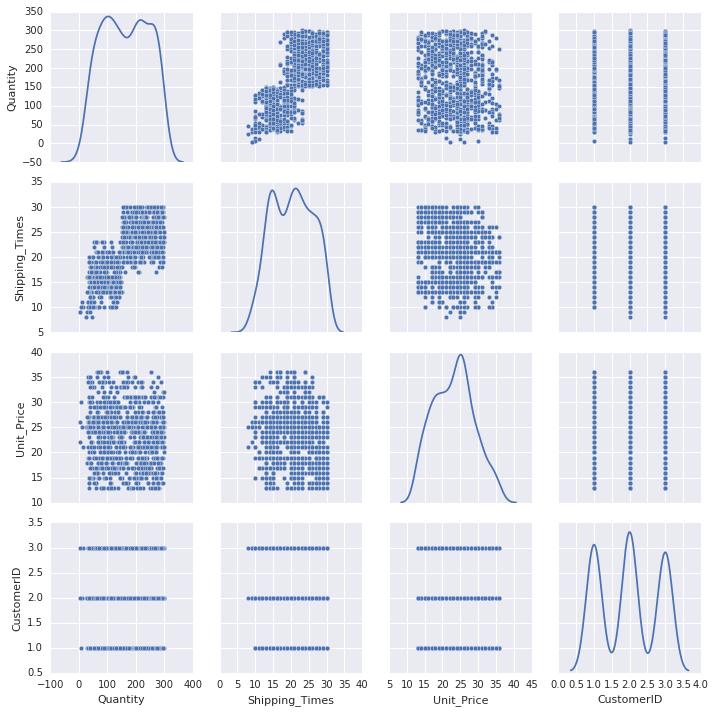

In [233]:
import seaborn as sns
%matplotlib inline
sns.pairplot(df, kind = 'scatter',diag_kind='kde')

In [234]:
mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std


[0 1 2]


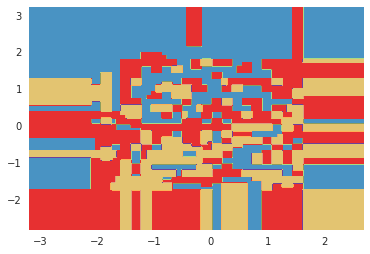

In [239]:
cmap = plt.cm.RdYlBu
plot_step = 0.02  # fine step width for decision surface contours
plot_step_coarser = 0.5  # step widths for coarse classifier guesses
RANDOM_SEED = 13  # fix the seed on each iteration


# Train
clf = RandomForestClassifier(n_estimators=53,random_state=123) 
clf.fit(X.iloc[:,1:3], y)
scores = clf.score(X.iloc[:,1:3], y)
import pylab as pl
x_min, x_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
y_min, y_max = X.iloc[:, 2].min() - 1, X.iloc[:, 2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

# Plot either a single DecisionTreeClassifier or alpha blend the
# decision surfaces of the ensemble of classifiers
conv = lambda x : ord(x) - 65

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
numZ = np.array([conv(z) for z in Z])
print(np.unique(numZ))

numZ = numZ.reshape(xx.shape)
cs = plt.contourf(xx, yy, numZ, cmap=pl.cm.Paired)


In [238]:
clf = RandomForestClassifier(n_estimators=53)
clf.fit(X_train, y_train)
for i, tree in enumerate(clf.estimators_):
    with open('tree_' + str(i) + '.dot', 'w') as dotfile:
        export_graphviz(tree, dotfile,feature_names=['Unit_Price', 'Shipping_times'])

NameError: name 'export_graphviz' is not defined

In [152]:
from io import StringIO
import pydotplus
import pydot
from sklearn import tree

from IPython.core.display import Image
from sklearn.externals.six import StringIO

In [165]:
# Visualize one of the trees
# dot_data = StringIO.StringIO()
# tree.export_graphviz(clf.estimators_[0], out_file=dot_data)
# graph = pydot.graph_from_dot_data(dot_data.getvalue())
# image = graph.write_png("./images/random_network.png")
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_test, y_test)
dot_data = tree.export_graphviz(clf,out_file='treevisual.dot')
from pydot import *
import pydotplus
import os
dotfile=StringIO()
dot_data = tree.export_graphviz(clf, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
#f = open("haha.png", 'w')
print(graph)
image = graph.write_png("haha.png")

#Image(graphs[0].create_png())


InvocationException: GraphViz's executables not found

In [ ]:
graphs

In [ ]:
with open("treevisual.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

In [145]:
#graph = pydotplus.graph_from_dot_data(ex.getvalue())
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf("tree.pdf") 

TypeError: object of type 'NoneType' has no len()

In [ ]:
import io
from scipy import misc
from sklearn import tree
def show_tree(decisionTree, file_path):
    dotfile = io.StringIO()
    tree.export_graphviz(decisionTree, out_file=dotfile)
    pydot.graph_from_dot_data(dotfile.getvalue())[0].write_png(file_path)
    i = misc.imread(file_path)
    plt.imshow(i)

# To use it
show_tree(clf, 'test.png')